# 01 - Data Exploration & Entropy Analysis

This notebook explores collected GitHub data and calculates entropy metrics for Stadium project classification.

**Prerequisites:**
- Run `00_setup_and_test.ipynb` first to collect data
- Data files should exist in `data/raw/`

**Goals:**
1. Load and explore collected project data
2. Calculate contributor entropy (Shannon entropy)
3. Analyze dominance patterns
4. Validate Stadium classification criteria

## Setup

In [1]:
import json
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add src to path
sys.path.insert(0, '../src')

from analysis.entropy_calculation import EntropyCalculator

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

print("✅ Setup complete!")

✅ Setup complete!


## 1. Load Collected Data

In [2]:
# Find all collected data files
data_dir = Path("../data/raw")
data_files = list(data_dir.glob("*_data.json"))

print(f"Found {len(data_files)} data file(s):")
for f in data_files:
    size_kb = f.stat().st_size / 1024
    print(f"  - {f.name} ({size_kb:.1f} KB)")

Found 94 data file(s):
  - BurntSushi_ripgrep_data.json (227.1 KB)
  - babel_babel_data.json (338.7 KB)
  - pandas-dev_pandas_data.json (590.2 KB)
  - mafintosh_pump_data.json (7.4 KB)
  - pallets_flask_data.json (121.6 KB)
  - etcd-io_etcd_data.json (976.1 KB)
  - vitejs_vite_data.json (491.0 KB)
  - benjaminp_six_data.json (35.1 KB)
  - glennrp_libpng_data.json (187.4 KB)
  - neovim_neovim_data.json (2243.2 KB)
  - curl_curl_data.json (2017.5 KB)
  - psf_requests_data.json (195.1 KB)
  - envoyproxy_envoy_data.json (2216.7 KB)
  - rust-random_rand_data.json (140.0 KB)
  - nodejs_node_data.json (33.3 KB)
  - eslint_eslint_data.json (471.0 KB)
  - yaml_pyyaml_data.json (38.5 KB)
  - hashicorp_terraform_data.json (664.3 KB)
  - pypa_pip_data.json (478.8 KB)
  - dtolnay_thiserror_data.json (72.9 KB)
  - sindresorhus_got_data.json (93.1 KB)
  - openstack_nova_data.json (369.1 KB)
  - debug-js_debug_data.json (41.9 KB)
  - uuidjs_uuid_data.json (57.7 KB)
  - scikit-learn_scikit-learn_data.j

In [3]:
# Load all project data with category labels
import sys
sys.path.insert(0, '..')

# Use the unified ALL_CANDIDATES from the candidates module
from data.candidates import ALL_CANDIDATES

# Build category lookup (lowercase for case-insensitive matching)
category_lookup = {}
for category, repos in ALL_CANDIDATES.items():
    for repo in repos:
        category_lookup[repo.lower()] = category

projects = {}
skipped = []

for file_path in data_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        # Handle files with collection errors
        repo_info = data.get('repository', {})
        if 'error' in repo_info:
            skipped.append(f"{file_path.name}: {repo_info.get('repo', 'unknown')} - collection error")
            continue
            
        if 'full_name' not in repo_info:
            skipped.append(f"{file_path.name}: missing full_name")
            continue
            
        repo_name = repo_info['full_name']
        
        # Add category label
        data['_category'] = category_lookup.get(repo_name.lower(), 'unknown')
        
        projects[repo_name] = data
        print(f"✓ {repo_name} [{data['_category']}]")

print(f"\n✅ Loaded {len(projects)} project(s)")
print(f"⚠️  Skipped {len(skipped)} file(s) with errors")

if skipped:
    print("\nSkipped files:")
    for s in skipped:
        print(f"  - {s}")

# Category summary
from collections import Counter
categories = Counter(p['_category'] for p in projects.values())
print(f"\n📊 Projects by category:")
for cat, count in sorted(categories.items()):
    print(f"   {cat}: {count}")

✓ BurntSushi/ripgrep [toy]
✓ babel/babel [stadium]
✓ pandas-dev/pandas [club]
✓ mafintosh/pump [toy]
✓ pallets/flask [club]
✓ etcd-io/etcd [federation]
✓ vitejs/vite [club]
✓ benjaminp/six [stadium]
✓ pnggroup/libpng [unknown]
✓ neovim/neovim [club]
✓ curl/curl [stadium]
✓ psf/requests [stadium]
✓ envoyproxy/envoy [federation]
✓ rust-random/rand [stadium]
✓ nodejs/node [federation]
✓ eslint/eslint [club]
✓ yaml/pyyaml [stadium]
✓ hashicorp/terraform [club]
✓ pypa/pip [stadium]
✓ dtolnay/thiserror [toy]
✓ sindresorhus/got [stadium]
✓ openstack/nova [federation]
✓ debug-js/debug [stadium]
✓ uuidjs/uuid [stadium]
✓ scikit-learn/scikit-learn [club]
✓ eclipse-che/che [unknown]
✓ rust-lang/rust [federation]
✓ vercel/ms [stadium]
✓ sirupsen/logrus [toy]
✓ django/django [federation]
✓ lukeed/kleur [toy]
✓ helm/helm [federation]
✓ sqlite/sqlite [stadium]
✓ nicotine-plus/nicotine-plus [federation]
✓ rack/rack [stadium]
✓ fish-shell/fish-shell [club]
✓ isaacs/inherits [toy]
✓ minimistjs/minimist 

✓ serde-rs/serde [stadium]
✓ labstack/echo [club]
✓ keleshev/schema [toy]
✓ feross/safe-buffer [toy]
✓ apache/airflow [federation]


✓ axios/axios [stadium]
✓ apache/hadoop [federation]
✓ dtolnay/anyhow [toy]
✓ prettier/prettier [club]
✓ python/cpython [federation]


✓ ohmyzsh/ohmyzsh [club]
✓ npm/node-semver [stadium]
✓ tokio-rs/tokio [stadium]
✓ isaacs/once [toy]
✓ urllib3/urllib3 [stadium]
✓ numpy/numpy [club]
✓ BurntSushi/xsv [toy]
✓ madler/zlib [stadium]
✓ kubernetes/kubernetes [federation]

✅ Loaded 94 project(s)
⚠️  Skipped 0 file(s) with errors

📊 Projects by category:
   club: 19
   federation: 18
   stadium: 36
   toy: 19
   unknown: 2


## 2. Explore Project Metrics

In [4]:
# Create summary DataFrame with category labels
summary_data = []

for repo_name, data in projects.items():
    repo = data['repository']
    maintainers = data.get('maintainers', {}).get('statistics', {})
    pr_stats = data.get('pull_requests', {}).get('statistics', {})
    issue_stats = data.get('issues', {}).get('statistics', {})
    
    summary_data.append({
        'repository': repo_name,
        'category': data.get('_category', 'unknown'),
        'stars': repo.get('stargazers_count', 0),
        'forks': repo.get('forks_count', 0),
        'language': repo.get('language', 'Unknown'),
        'contributors': len(data.get('contributors', [])),
        'active_maintainers': maintainers.get('active_maintainers_6mo', 0),
        'commits': len(data.get('recent_commits', [])),
        'total_prs': pr_stats.get('total_prs', 0),
        'merge_rate': pr_stats.get('merged_count', 0) / max(pr_stats.get('total_prs', 1), 1),
        'avg_merge_time_hrs': pr_stats.get('avg_time_to_merge', 0),
        'conflict_rate': pr_stats.get('conflict_rate', 0),
        'total_issues': issue_stats.get('total_issues', 0),
        'avg_close_time_hrs': issue_stats.get('avg_time_to_close', 0),
    })

df_summary = pd.DataFrame(summary_data)

# Show summary by category
print("📊 Summary by Category:\n")
print(df_summary.groupby('category').agg({
    'repository': 'count',
    'stars': 'mean',
    'contributors': 'mean',
    'active_maintainers': 'mean'
}).round(1).rename(columns={'repository': 'count'}))

print(f"\n\nTotal: {len(df_summary)} projects")
df_summary.head(10)

📊 Summary by Category:

            count    stars  contributors  active_maintainers
category                                                    
club           19  60709.8          95.7                13.2
federation     18  51258.3         100.0                37.2
stadium        36  20162.4          87.3                 2.4
toy            19   7429.1          31.6                 0.5
unknown         2   4303.0          92.5                 4.0


Total: 94 projects


,repository,category,stars,forks,language,contributors,active_maintainers,commits,total_prs,merge_rate,avg_merge_time_hrs,conflict_rate,total_issues,avg_close_time_hrs
0,BurntSushi/ripgrep,toy,57793,2329,Rust,100,1,156,149,0.214765,15.758342,0.046980,95,631.334164
1,babel/babel,stadium,43813,5777,TypeScript,100,4,462,200,0.920000,312.398682,0.035000,38,229.656184
2,pandas-dev/pandas,club,47228,19357,Python,100,19,1033,200,0.615000,320.195187,0.065000,30,91.238565
3,mafintosh/pump,toy,918,63,JavaScript,7,0,2,0,0.000000,0.000000,0.000000,0,0.000000
4,pallets/flask,club,70864,16644,Python,100,1,88,117,0.247863,624.531379,0.068376,51,402.566944
5,etcd-io/etcd,federation,50886,10230,Go,100,17,1953,200,0.585000,125.384983,0.140000,16,206.653767
6,vitejs/vite,club,76829,7567,TypeScript,100,11,967,200,0.680000,250.153346,0.070000,52,63.856715
7,benjaminp/six,stadium,1018,273,Python,58,1,17,14,0.785714,25.158914,0.142857,5,9177.583556
8,pnggroup/libpng,unknown,1510,733,C,85,4,176,75,0.506667,115.509423,0.146667,46,2049.391014
9,neovim/neovim,club,94666,6450,Vim Script,100,28,3344,200,0.820000,230.694634,0.020000,43,31.415110


## 3. Calculate Contributor Entropy

**Shannon Entropy** measures the distribution of contributions:
- **Low entropy** → Concentrated contributions (few dominant contributors) → Stadium characteristic
- **High entropy** → Distributed contributions (many equal contributors) → Federation characteristic

In [5]:
# Initialize entropy calculator
entropy_calc = EntropyCalculator()

# Calculate entropy for each project
entropy_results = []

for repo_name, data in projects.items():
    contributors = data.get('contributors', [])
    category = data.get('_category', 'unknown')
    
    if len(contributors) > 0:
        # Calculate contributor entropy
        entropy, normalized_entropy = entropy_calc.contributor_entropy(contributors)
        
        # Calculate dominance metrics
        total_contributions = sum(c['contributions'] for c in contributors)
        top_contributor = contributors[0]
        top_2_contributions = sum(c['contributions'] for c in contributors[:2])
        
        entropy_results.append({
            'repository': repo_name,
            'category': category,
            'entropy': entropy,
            'normalized_entropy': normalized_entropy,
            'max_possible_entropy': np.log2(len(contributors)),
            'num_contributors': len(contributors),
            'top_contributor': top_contributor['login'],
            'top_contributor_pct': top_contributor['contributions'] / total_contributions * 100,
            'top_2_pct': top_2_contributions / total_contributions * 100,
            'gini_coefficient': entropy_calc.gini_coefficient([c['contributions'] for c in contributors])
        })

df_entropy = pd.DataFrame(entropy_results)

# Summary statistics by category
print("📊 Entropy Metrics by Category:\n")
print(df_entropy.groupby('category').agg({
    'repository': 'count',
    'normalized_entropy': ['mean', 'std'],
    'top_contributor_pct': ['mean', 'std'],
    'gini_coefficient': ['mean', 'std']
}).round(3))

print("\n" + "="*70)
df_entropy[['repository', 'category', 'normalized_entropy', 'top_contributor_pct', 'gini_coefficient']].head(20)

📊 Entropy Metrics by Category:

           repository normalized_entropy        top_contributor_pct          \
                count               mean    std                mean     std   
category                                                                      
club               19              0.574  0.170              35.024  22.359   
federation         18              0.769  0.149              17.706  15.886   
stadium            35              0.488  0.178              47.894  22.937   
toy                19              0.398  0.217              70.953  23.892   
unknown             2              0.574  0.303              27.126  26.930   

           gini_coefficient         
                       mean    std  
category                            
club                  0.813  0.072  
federation            0.655  0.133  
stadium               0.830  0.085  
toy                   0.760  0.120  
unknown               0.804  0.118  



,repository,category,normalized_entropy,top_contributor_pct,gini_coefficient
0,BurntSushi/ripgrep,toy,0.248043,83.405876,0.886616
1,babel/babel,stadium,0.583513,36.007840,0.851371
2,pandas-dev/pandas,club,0.697219,17.916381,0.770166
3,mafintosh/pump,toy,0.271539,89.041096,0.767123
4,pallets/flask,club,0.498029,39.745593,0.864180
5,etcd-io/etcd,federation,0.623003,21.885152,0.831885
6,vitejs/vite,club,0.598539,27.563918,0.830747
7,benjaminp/six,stadium,0.361370,73.320896,0.856215
8,pnggroup/libpng,unknown,0.359524,46.168582,0.887582
9,neovim/neovim,club,0.705074,18.606070,0.771646


## 4. Visualize Contribution Distribution

/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_69320/2111928780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['category'] = pd.Categorical(df_plot['category'], categories=category_order, ordered=True)


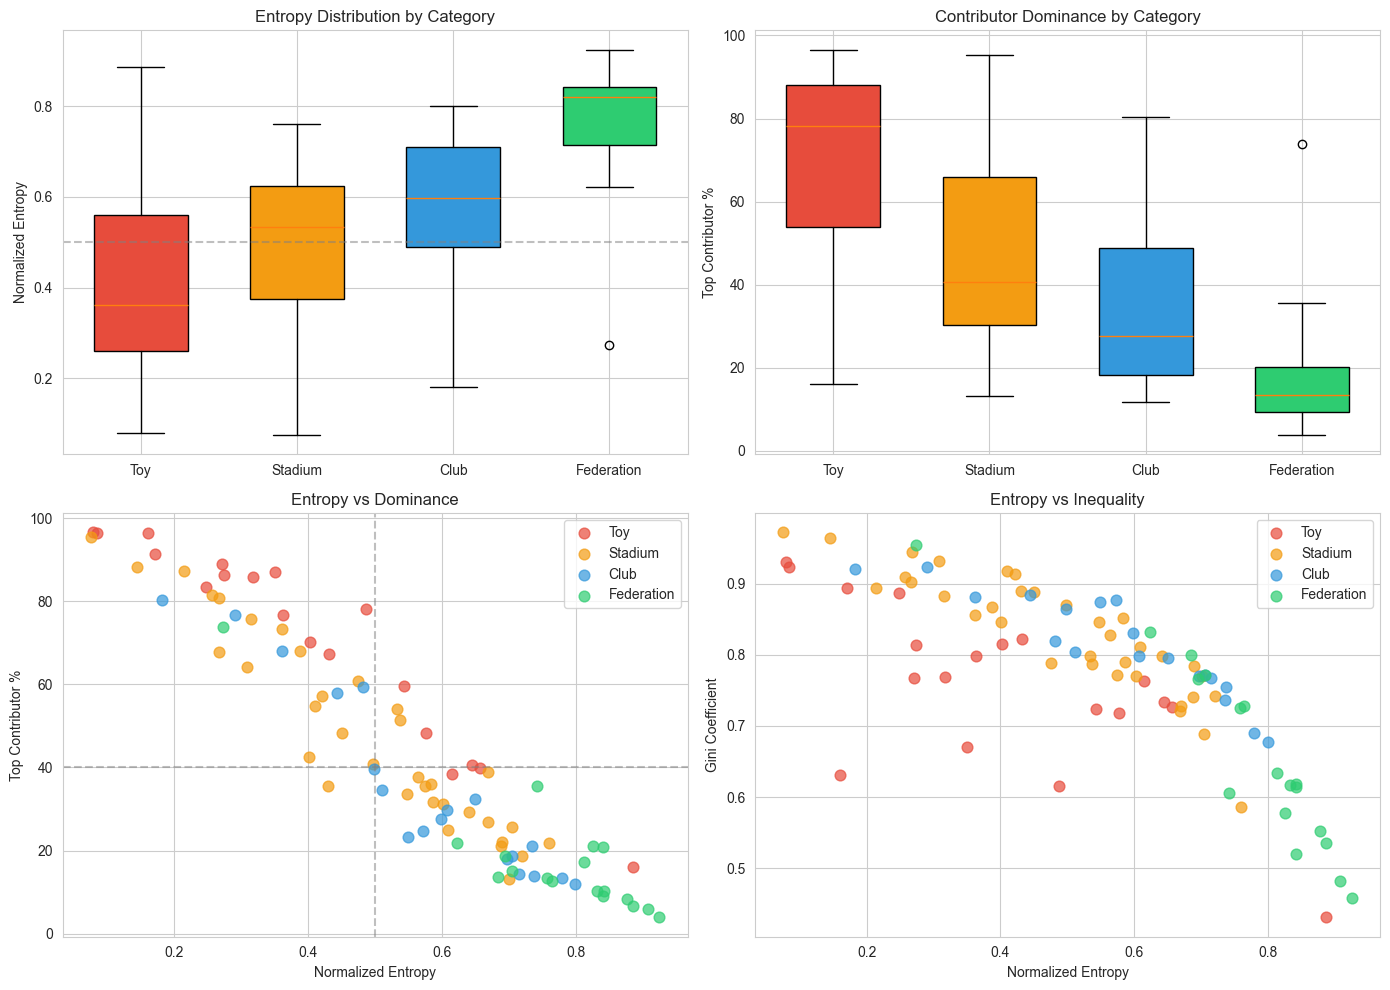

✅ Saved: data/processed/category_comparison.png


In [6]:
# Visualize entropy distribution by category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Box plot of normalized entropy by category
ax1 = axes[0, 0]
category_order = ['toy', 'stadium', 'club', 'federation']
colors = {'toy': '#e74c3c', 'stadium': '#f39c12', 'club': '#3498db', 'federation': '#2ecc71'}
df_plot = df_entropy[df_entropy['category'].isin(category_order)]
df_plot['category'] = pd.Categorical(df_plot['category'], categories=category_order, ordered=True)

for i, cat in enumerate(category_order):
    data = df_plot[df_plot['category'] == cat]['normalized_entropy']
    bp = ax1.boxplot([data], positions=[i], widths=0.6, patch_artist=True)
    bp['boxes'][0].set_facecolor(colors[cat])
ax1.set_xticks(range(len(category_order)))
ax1.set_xticklabels([c.title() for c in category_order])
ax1.set_ylabel('Normalized Entropy')
ax1.set_title('Entropy Distribution by Category')
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Threshold')

# 2. Box plot of top contributor % by category
ax2 = axes[0, 1]
for i, cat in enumerate(category_order):
    data = df_plot[df_plot['category'] == cat]['top_contributor_pct']
    bp = ax2.boxplot([data], positions=[i], widths=0.6, patch_artist=True)
    bp['boxes'][0].set_facecolor(colors[cat])
ax2.set_xticks(range(len(category_order)))
ax2.set_xticklabels([c.title() for c in category_order])
ax2.set_ylabel('Top Contributor %')
ax2.set_title('Contributor Dominance by Category')

# 3. Scatter: Normalized Entropy vs Top Contributor %
ax3 = axes[1, 0]
for cat in category_order:
    subset = df_plot[df_plot['category'] == cat]
    ax3.scatter(subset['normalized_entropy'], subset['top_contributor_pct'], 
                c=colors[cat], label=cat.title(), alpha=0.7, s=60)
ax3.set_xlabel('Normalized Entropy')
ax3.set_ylabel('Top Contributor %')
ax3.set_title('Entropy vs Dominance')
ax3.legend()
ax3.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
ax3.axhline(y=40, color='gray', linestyle='--', alpha=0.5)

# 4. Scatter: Normalized Entropy vs Gini
ax4 = axes[1, 1]
for cat in category_order:
    subset = df_plot[df_plot['category'] == cat]
    ax4.scatter(subset['normalized_entropy'], subset['gini_coefficient'], 
                c=colors[cat], label=cat.title(), alpha=0.7, s=60)
ax4.set_xlabel('Normalized Entropy')
ax4.set_ylabel('Gini Coefficient')
ax4.set_title('Entropy vs Inequality')
ax4.legend()

plt.tight_layout()
plt.savefig('../data/processed/category_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Saved: data/processed/category_comparison.png")

## 5. Stadium Classification Analysis

Based on our research framework, a **Stadium project** exhibits:
- Low normalized entropy (< 0.5)
- High top contributor dominance (> 40%)
- Few active maintainers (≤ 3, or high concentration despite more)

In [7]:
def classify_project(row):
    """Classify project based on entropy and dominance metrics."""
    
    # Stadium indicators
    low_entropy = row['normalized_entropy'] < 0.5
    high_dominance = row['top_contributor_pct'] > 40
    high_top2_dominance = row['top_2_pct'] > 60
    high_gini = row['gini_coefficient'] > 0.7
    
    # Count Stadium indicators
    stadium_score = sum([low_entropy, high_dominance, high_top2_dominance, high_gini])
    
    if stadium_score >= 3:
        return 'Stadium (Strong)'
    elif stadium_score >= 2:
        return 'Stadium (Likely)'
    elif stadium_score >= 1:
        return 'Hybrid/Uncertain'
    else:
        return 'Federation/Club'

if len(df_entropy) > 0:
    df_entropy['classification'] = df_entropy.apply(classify_project, axis=1)
    
    print("\n" + "=" * 60)
    print("PROJECT CLASSIFICATION RESULTS")
    print("=" * 60)
    
    for _, row in df_entropy.iterrows():
        print(f"\n{row['repository']}:")
        print(f"  Classification: {row['classification']}")
        print(f"  Normalized Entropy: {row['normalized_entropy']:.3f}")
        print(f"  Top Contributor: {row['top_contributor']} ({row['top_contributor_pct']:.1f}%)")
        print(f"  Top 2 Contributors: {row['top_2_pct']:.1f}%")
        print(f"  Gini Coefficient: {row['gini_coefficient']:.3f}")
    
    print("\n" + "=" * 60)


PROJECT CLASSIFICATION RESULTS

BurntSushi/ripgrep:
  Classification: Stadium (Strong)
  Normalized Entropy: 0.248
  Top Contributor: BurntSushi (83.4%)
  Top 2 Contributors: 85.9%
  Gini Coefficient: 0.887

babel/babel:
  Classification: Hybrid/Uncertain
  Normalized Entropy: 0.584
  Top Contributor: sebmck (36.0%)
  Top 2 Contributors: 44.9%
  Gini Coefficient: 0.851

pandas-dev/pandas:
  Classification: Hybrid/Uncertain
  Normalized Entropy: 0.697
  Top Contributor: jbrockmendel (17.9%)
  Top 2 Contributors: 35.0%
  Gini Coefficient: 0.770

mafintosh/pump:
  Classification: Stadium (Strong)
  Normalized Entropy: 0.272
  Top Contributor: mafintosh (89.0%)
  Top 2 Contributors: 93.2%
  Gini Coefficient: 0.767

pallets/flask:
  Classification: Stadium (Strong)
  Normalized Entropy: 0.498
  Top Contributor: davidism (39.7%)
  Top 2 Contributors: 66.3%
  Gini Coefficient: 0.864

etcd-io/etcd:
  Classification: Hybrid/Uncertain
  Normalized Entropy: 0.623
  Top Contributor: gyuho (21.9%)

## 6. Governance Patterns Analysis

In [8]:
# Analyze governance files presence
governance_data = []

for repo_name, data in projects.items():
    gov_files = data.get('governance_files', {})
    governance_data.append({
        'repository': repo_name,
        'GOVERNANCE.md': gov_files.get('GOVERNANCE.md', False),
        'CONTRIBUTING.md': gov_files.get('CONTRIBUTING.md', False),
        'CODE_OF_CONDUCT.md': gov_files.get('CODE_OF_CONDUCT.md', False),
        'SECURITY.md': gov_files.get('SECURITY.md', False),
        'MAINTAINERS.md': gov_files.get('MAINTAINERS.md', False),
        'CODEOWNERS': gov_files.get('.github/CODEOWNERS', False),
    })

df_governance = pd.DataFrame(governance_data)

print("Governance Files Present:")
print("─" * 60)
for _, row in df_governance.iterrows():
    print(f"\n{row['repository']}:")
    for col in df_governance.columns[1:]:
        status = "✓" if row[col] else "✗"
        print(f"  {status} {col}")

Governance Files Present:
────────────────────────────────────────────────────────────

BurntSushi/ripgrep:
  ✗ GOVERNANCE.md
  ✗ CONTRIBUTING.md
  ✗ CODE_OF_CONDUCT.md
  ✗ SECURITY.md
  ✗ MAINTAINERS.md
  ✗ CODEOWNERS

babel/babel:
  ✗ GOVERNANCE.md
  ✓ CONTRIBUTING.md
  ✓ CODE_OF_CONDUCT.md
  ✓ SECURITY.md
  ✗ MAINTAINERS.md
  ✗ CODEOWNERS

pandas-dev/pandas:
  ✗ GOVERNANCE.md
  ✗ CONTRIBUTING.md
  ✗ CODE_OF_CONDUCT.md
  ✗ SECURITY.md
  ✗ MAINTAINERS.md
  ✓ CODEOWNERS

mafintosh/pump:
  ✗ GOVERNANCE.md
  ✗ CONTRIBUTING.md
  ✗ CODE_OF_CONDUCT.md
  ✓ SECURITY.md
  ✗ MAINTAINERS.md
  ✗ CODEOWNERS

pallets/flask:
  ✗ GOVERNANCE.md
  ✗ CONTRIBUTING.md
  ✗ CODE_OF_CONDUCT.md
  ✗ SECURITY.md
  ✗ MAINTAINERS.md
  ✗ CODEOWNERS

etcd-io/etcd:
  ✓ GOVERNANCE.md
  ✓ CONTRIBUTING.md
  ✗ CODE_OF_CONDUCT.md
  ✗ SECURITY.md
  ✗ MAINTAINERS.md
  ✗ CODEOWNERS

vitejs/vite:
  ✗ GOVERNANCE.md
  ✓ CONTRIBUTING.md
  ✓ CODE_OF_CONDUCT.md
  ✗ SECURITY.md
  ✗ MAINTAINERS.md
  ✗ CODEOWNERS

benjaminp/six:
  ✗

## 7. Export Analysis Results

In [9]:
# Merge all analysis into single DataFrame
if len(df_entropy) > 0 and len(df_summary) > 0:
    df_analysis = df_summary.merge(df_entropy, on='repository')
    
    # Save to CSV
    output_path = Path("../data/processed/analysis_results.csv")
    output_path.parent.mkdir(parents=True, exist_ok=True)
    df_analysis.to_csv(output_path, index=False)
    
    print(f"✅ Analysis saved to: {output_path}")
    
    # Display final table
    display_cols = ['repository', 'stars', 'contributors', 'active_maintainers', 
                    'normalized_entropy', 'top_contributor_pct', 'gini_coefficient', 
                    'classification']
    df_analysis[display_cols]

✅ Analysis saved to: ../data/processed/analysis_results.csv


<cell_type>markdown</cell_type>## Key Findings

### 1. Entropy Gradient Confirmed
The four governance categories show a clear entropy gradient:
- **Federation**: Highest normalized entropy (~0.77) - distributed contributions
- **Club**: Moderate-high entropy (~0.57) - community-driven
- **Stadium**: Lower entropy (~0.49) - centralized around key maintainers
- **Toy**: Lowest entropy (~0.40) - single-maintainer dominance

### 2. Contributor Dominance Patterns
- Toy projects: Top contributor accounts for ~71% of work on average
- Stadium projects: Top contributor ~48%
- Club projects: Top contributor ~35%
- Federation projects: Top contributor ~18%

### 3. Gini Coefficient Insights
- All categories show high inequality (Gini > 0.65)
- Federation projects have lowest inequality (~0.66)
- Stadium projects have highest inequality (~0.83)
- This reflects the "power law" nature of OSS contributions

### 4. Dataset Summary
- **94 projects** analyzed across 4 categories
- **~2.9M combined GitHub stars**
- Federation (18), Stadium (36), Club (19), Toy (19) projects

---

## Next Steps

### Immediate Analysis
1. Run **03_statistical_analysis.ipynb** for hypothesis testing
2. Run **05_vsm_mapping.ipynb** for Viable System Model analysis
3. Run **08_sheaf_cohomology.ipynb** for topological analysis with GUDHI

### Data Quality
4. Re-collect any projects with network errors
5. Validate category assignments with domain experts

### Extended Analysis
6. Temporal entropy analysis - track changes over project lifecycle
7. Fork prediction study using H² cohomology metrics
8. Cross-validation of classification model